In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [5]:
texture = mpimg.imread('./textura2.jpeg')
canvas = mpimg.imread('./canvas2.jpg')

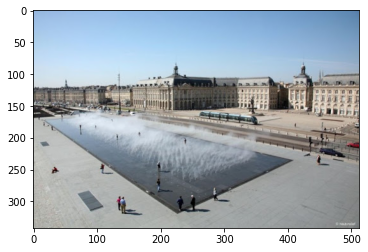

In [6]:
imgplot = plt.imshow(canvas)

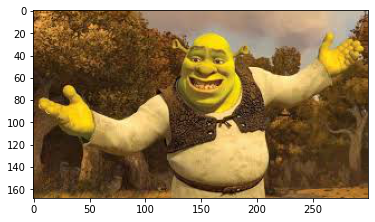

In [7]:
imgplot = plt.imshow(texture)

In [8]:
texture_coord = np.array([[0, 0, 1], [168, 0, 1], [168, 300, 1], [0, 300, 1]])
canvas_coord = np.array([[162, 94, 1], [172, 15, 1],[317, 225, 1], [234, 408, 1]])

In [9]:
print(texture_coord)
print(canvas_coord)

[[  0   0   1]
 [168   0   1]
 [168 300   1]
 [  0 300   1]]
[[162  94   1]
 [172  15   1]
 [317 225   1]
 [234 408   1]]


In [10]:
T_helper = np.zeros((12,12))
B_helper = np.zeros((12,1))

In [11]:
for i in range(4):
    for j in range(3):
        for k in range(3):
            T_helper[3*i+k][j+3*k] = texture_coord[i][j]

for i in range(3):
    B_helper[i][0] = canvas_coord[0][i]
    
T_helper[3*1][9] = -canvas_coord[0+1][0];
T_helper[3*1 + 1][9] = -canvas_coord[0+1][1];
T_helper[3*1 + 2][9] = -canvas_coord[0+1][2];

T_helper[3*2][10] = -canvas_coord[1+1][0];
T_helper[3*2 + 1][10] = -canvas_coord[1+1][1];
T_helper[3*2 + 2][10] = -canvas_coord[1+1][2];

T_helper[3*3][11] = -canvas_coord[2+1][0];
T_helper[3*3 + 1][11] = -canvas_coord[2+1][1];
T_helper[3*3 + 2][11] = -canvas_coord[2+1][2];

In [12]:
print(T_helper, B_helper)

[[   0.    0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    1.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.    0.]
 [ 168.    0.    1.    0.    0.    0.    0.    0.    0. -172.    0.    0.]
 [   0.    0.    0.  168.    0.    1.    0.    0.    0.  -15.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  168.    0.    1.   -1.    0.    0.]
 [ 168.  300.    1.    0.    0.    0.    0.    0.    0.    0. -317.    0.]
 [   0.    0.    0.  168.  300.    1.    0.    0.    0.    0. -225.    0.]
 [   0.    0.    0.    0.    0.    0.  168.  300.    1.    0.   -1.    0.]
 [   0.  300.    1.    0.    0.    0.    0.    0.    0.    0.    0. -234.]
 [   0.    0.    0.    0.  300.    1.    0.    0.    0.    0.    0. -408.]
 [   0.    0.    0.    0.    0.    0.    0.  300.    1.    0.    0.   -1.]] [[162.]
 [ 94.]
 [  1.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]
 [  0.]]


In [13]:
sol_helper = np.linalg.solve(T_helper, B_helper)
print(sol_helper)

transform = np.zeros((3,3))

for i in range(9):
    transform[i//3][i%3] = sol_helper[i][0]

print(transform)

[[-5.05534706e-02]
 [-2.99515524e-01]
 [ 1.62000000e+02]
 [-4.79837858e-01]
 [ 1.05972933e-01]
 [ 9.40000000e+01]
 [-6.39984187e-04]
 [-2.30562190e-03]
 [ 1.00000000e+00]
 [ 8.92482657e-01]
 [ 2.00796088e-01]
 [ 3.08313431e-01]]
[[-5.05534706e-02 -2.99515524e-01  1.62000000e+02]
 [-4.79837858e-01  1.05972933e-01  9.40000000e+01]
 [-6.39984187e-04 -2.30562190e-03  1.00000000e+00]]


In [14]:
aux = np.matmul(transform, texture_coord[3])
aux = aux/aux[2]

print(texture_coord[3])
print(aux)

[  0 300   1]
[234. 408.   1.]


In [15]:
inv_transform = np.linalg.inv(transform)
#print(inv_transform)
aux = np.matmul(inv_transform, canvas_coord[0])
aux = aux / aux[2]
print(aux)

[ 0.00000000e+00 -2.27373675e-13  1.00000000e+00]


In [16]:
test_texture = np.copy(texture)
test_canvas = np.copy(canvas)

print(test_texture.shape)
print(test_canvas.shape)

(168, 300, 3)
(342, 512, 3)


In [17]:
for i in range(len(test_canvas)):
    for j in range(len(test_canvas[0])):
        c_coord_proj = np.array([i, j, 1])
        t_coord_proj = np.matmul(inv_transform, c_coord_proj)
        t_coord_proj = t_coord_proj/t_coord_proj[2]
        
        if(i == 0 and j == 0):
            print(t_coord_proj)
            print(c_coord_proj)

        a,b = int(t_coord_proj[0]), int(t_coord_proj[1])
        
        if(a >= 0 and a < 168 and b >= 0 and b < 300):
            test_canvas[i][j] = test_texture[a][b]

[304.01954411 489.55979012   1.        ]
[0 0 1]


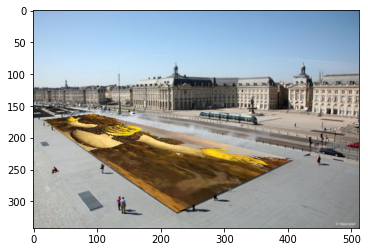

In [18]:
result = plt.imshow(test_canvas)